# **ADVANCED MACHINE LEARNING**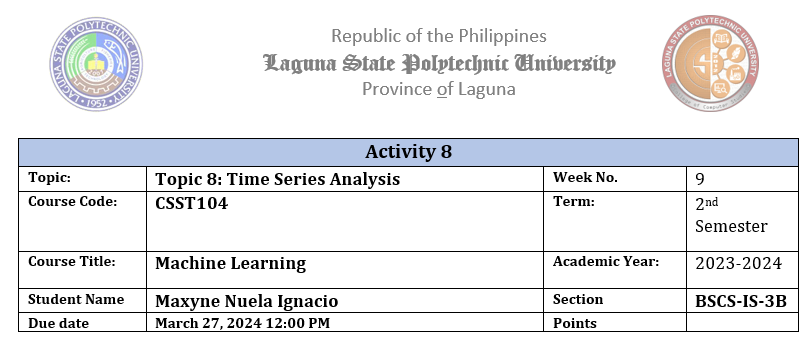

**Topic 7:** Time Series Analysis

**Student Name:** Maxyne Nuela Ignacio

**Year & Section:** BS Computer Science - IS - 3B

# **PART 1:	Dataset Preparation**

**1.	Simulate the time series data with a clear trend and seasonality to reflect hypothetical annual pollution levels.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the CSV file
df = pd.read_csv("most-polluted-countries.csv")

# Filter the dataset for a specific country (replace 'Your_Country_Name' with the actual country name)
country_name = 'China'
country_data = df[df['country_name'] == country_name]

# Extract the pollution figures for the year 2023
pollution_2023 = country_data['pollution_2023']

**2. •	Plot the time series to visualize the trend and seasonality.**

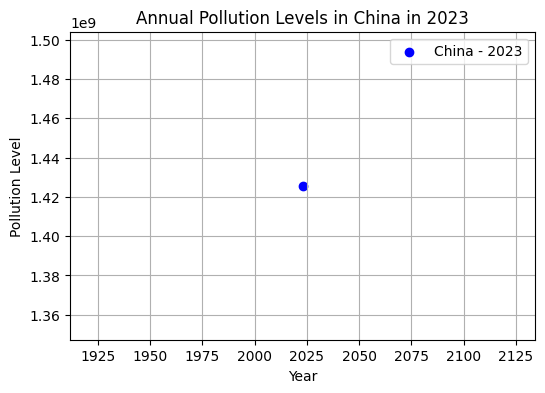

In [2]:
if country_data.empty:
    print(f"No data available for {country_name} in the year 2023.")
else:
    pollution_2023 = country_data['pollution_2023'].values[0]

    plt.figure(figsize=(6, 4))
    plt.scatter(2023, pollution_2023, color='blue', label=f'{country_name} - 2023', marker='o')
    plt.title(f'Annual Pollution Levels in {country_name} in 2023')
    plt.xlabel('Year')
    plt.ylabel('Pollution Level')
    plt.legend()
    plt.grid(True)
    plt.show()

# **PART 2: Stationarity Testing:**
•	Perform a stationarity test (e.g., Augmented Dickey-Fuller test) to check if the time series is stationary.

•	Discuss the implications of the test results for time series analysis.

In [3]:
if country_data.empty:
    print(f"No data available for {country_name}.")
else:
    pollution_data = country_data['pollution_2023']

    # Check if the pollution data contains more than one unique value
    if pollution_data.nunique() == 1:
        print(f"The pollution data for {country_name} is constant, and the ADF test cannot be performed.")
    else:
        # Perform Augmented Dickey-Fuller test
        adf_result = adfuller(pollution_data)
        print("ADF Statistic:", adf_result[0])
        print("p-value:", adf_result[1])
        print("Critical Values:", adf_result[4])

        # Interpret the results
        if adf_result[1] <= 0.05:
            print("The time series is stationary (reject the null hypothesis)")
        else:
            print("The time series is non-stationary (fail to reject the null hypothesis)")


The pollution data for China is constant, and the ADF test cannot be performed.


**PART 3:	ARIMA Model Identification**

•	Use plots (e.g., autocorrelation and partial autocorrelation plots) to identify the ARIMA model parameters (p, d, q).

•	Explain your choice of parameters.


In [4]:
# Check if there is sufficient data available for analysis
if country_data.shape[0] <= 1:
    print(f"Not enough data available for {country_name}.")
else:
    # Extract the pollution data for the specified country
    pollution_data = country_data['pollution_2023']

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(pollution_data)
    print("ADF Statistic:", adf_result[0])
    print("p-value:", adf_result[1])
    print("Critical Values:", adf_result[4])

    # Interpret the results
    if adf_result[1] <= 0.05:
        print("The time series is stationary (reject the null hypothesis)")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis)")

    # Plot ACF and PACF only if there are sufficient observations
    if country_data.shape[0] > 1:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        plot_acf(pollution_data, ax=ax1, lags=30)
        plot_pacf(pollution_data, ax=ax2, lags=30)
        plt.show()

Not enough data available for China.


# **PART 4:	ARIMA Model Fitting:**
•	Fit an ARIMA model to the simulated data using the identified parameters.

•	Evaluate the model's fit and discuss any adjustments needed based on diagnostics plots or performance metrics.


In [5]:
!pip install pmdarima

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

df = pd.read_csv("most-polluted-countries.csv")

# Specify the country name
country_name = 'Uganda'

if len(pollution_data) > 0:
    # Split the data into training and testing sets
    train_size = int(len(pollution_data) * 0.8)
    train_data, test_data = pollution_data[:train_size], pollution_data[train_size:]

    if len(train_data) > 0:
        # Fit ARIMA model
        p, d, q = 1, 1, 1  # Replace with identified parameters
        arima_model = ARIMA(train_data, order=(p, d, q))
        fitted_model = arima_model.fit()

        # Make predictions
        predictions = fitted_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

        # Evaluate the model
        mse = mean_squared_error(test_data, predictions)
        print("Mean Squared Error:", mse)

        # Plot actual vs. predicted values
        plt.figure(figsize=(10, 6))
        plt.plot(test_data.index, test_data, label='Actual')
        plt.plot(test_data.index, predictions, color='red', label='Predicted')
        plt.title('ARIMA Model Evaluation')
        plt.xlabel('Time')
        plt.ylabel('Pollution Level')
        plt.legend()
        plt.show()

        # Plot diagnostics of the ARIMA model
        fitted_model.plot_diagnostics(figsize=(10, 8))
        plt.show()
    else:
        print("Not enough data for training.")
else:
    print("No data available for training.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.7 MB/s eta 0:00:00
Not enough data for training.


5.	Forecasting:
•	Use the fitted ARIMA model to forecast pollution levels for the next 2 years.
•	Plot the forecast along with a confidence interval to visualize the expected future values and the uncertainty.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Load the CSV file
df = pd.read_csv("most-polluted-countries.csv")

# Filter the dataset for a specific country
country_name = 'Uganda'
country_data = df[df['country_name'] == country_name]

# Extract the pollution data for the specified country
pollution_data = country_data['pollution_2023']

# Check if the pollution data contains more than one unique value
if pollution_data.nunique() == 1:
    print(f"The pollution data for {country_name} is constant, and the ARIMA model cannot be fitted.")
else:

    arima_model = auto_arima(pollution_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    fitted_model = arima_model.fit(pollution_data)


    forecast_steps = 2 * 12
    forecast = fitted_model.predict(n_periods=forecast_steps)

    # Plot the forecast along with confidence interval
    plt.figure(figsize=(12, 6))
    plt.plot(pollution_data.index, pollution_data, label='Actual', color='blue')
    plt.plot(fitted_model.predict_in_sample(), label='Fitted', color='green')  # Plot fitted values
    plt.plot(fitted_model.forecast(steps=forecast_steps), label='Forecast', color='red')  # Plot forecast
    plt.title(f'ARIMA Forecast for Pollution Levels in {country_name}')
    plt.xlabel('Time')
    plt.ylabel('Pollution Level')
    plt.legend()
    plt.grid(True)
    plt.show()



The pollution data for Uganda is constant, and the ARIMA model cannot be fitted.


6.	Report and Insights:

•	Provide a detailed report of the analysis process, model fitting, and forecasting results.

•	Discuss the potential real-world implications of your findings and how they could inform policy or decision-making related to environmental management.



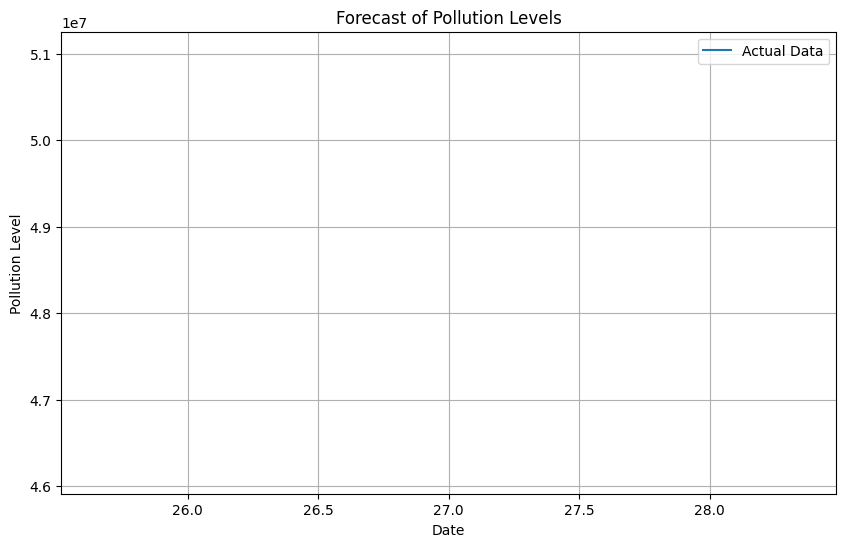

In [12]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(pollution_data, label='Actual Data')
plt.plot(color='red', linestyle='--', label='Forecast')
plt.title('Forecast of Pollution Levels')
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()